# Day 2: Dataset Analysis & Exploration
# Heart Disease UCI Dataset - Exploratory Data Analysis

## Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport  # optional, for eda_report.html

## Load Dataset

In [3]:
# Load dataset
df = pd.read_csv("../data/raw/heart_disease_uci.csv")

## Dataset Overview

In [4]:
print("Shape of dataset:", df.shape)
print("\nInfo:\n")
print(df.info())
print("\nFirst 5 rows:\n", df.head())

Shape of dataset: (920, 16)

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None

First 5 rows:
    id  age     sex    dataset               cp  trestbps   chol    fbs  

## Summary Statistics

In [5]:
summary_stats = df.describe(include="all")
summary_stats.to_csv("../reports/dataset_summary_statistics.csv")  # raw stats for reference
display(summary_stats)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
count,920.000000,920.000000,920,920,920,861.000000,890.000000,830,918,865.000000,865,858.000000,611,309.000000,434,920.000000
unique,NaN,NaN,2,4,4,NaN,NaN,2,3,NaN,2,NaN,3,NaN,3,NaN
top,NaN,NaN,Male,Cleveland,asymptomatic,NaN,NaN,False,normal,NaN,False,NaN,flat,NaN,normal,NaN
freq,NaN,NaN,726,304,496,NaN,NaN,692,551,NaN,528,NaN,345,NaN,196,NaN
mean,460.500000,53.510870,NaN,NaN,NaN,132.132404,199.130337,NaN,NaN,137.545665,NaN,0.878788,NaN,0.676375,NaN,0.995652
std,265.725422,9.424685,NaN,NaN,NaN,19.066070,110.780810,NaN,NaN,25.926276,NaN,1.091226,NaN,0.935653,NaN,1.142693
min,1.000000,28.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,60.000000,NaN,-2.600000,NaN,0.000000,NaN,0.000000
25%,230.750000,47.000000,NaN,NaN,NaN,120.000000,175.000000,NaN,NaN,120.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000
50%,460.500000,54.000000,NaN,NaN,NaN,130.000000,223.000000,NaN,NaN,140.000000,NaN,0.500000,NaN,0.000000,NaN,1.000000
75%,690.250000,60.000000,NaN,NaN,NaN,140.000000,268.000000,NaN,NaN,157.000000,NaN,1.500000,NaN,1.000000,NaN,2.000000


## Missing Values Analysis

In [6]:
missing = df.isnull().sum()
print("\nMissing values:\n", missing)


Missing values:
 id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


## Target Distribution

C:\Users\acer\AppData\Local\Temp\ipykernel_32556\1178967209.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="num", data=df, palette="viridis")


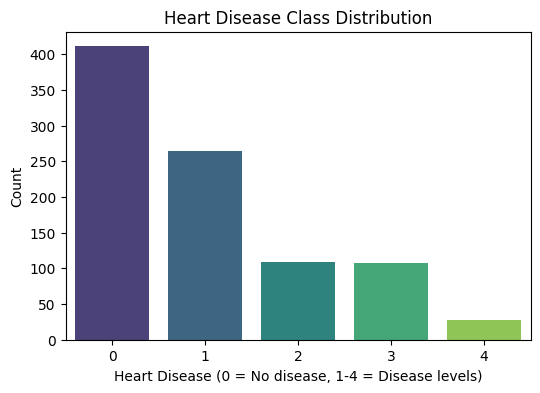

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(x="num", data=df, palette="viridis")
plt.title("Heart Disease Class Distribution")
plt.xlabel("Heart Disease (0 = No disease, 1-4 = Disease levels)")
plt.ylabel("Count")
plt.savefig("../visuals/class_distribution.png", dpi=300, bbox_inches="tight")
plt.show()

## Histograms of Numeric Features

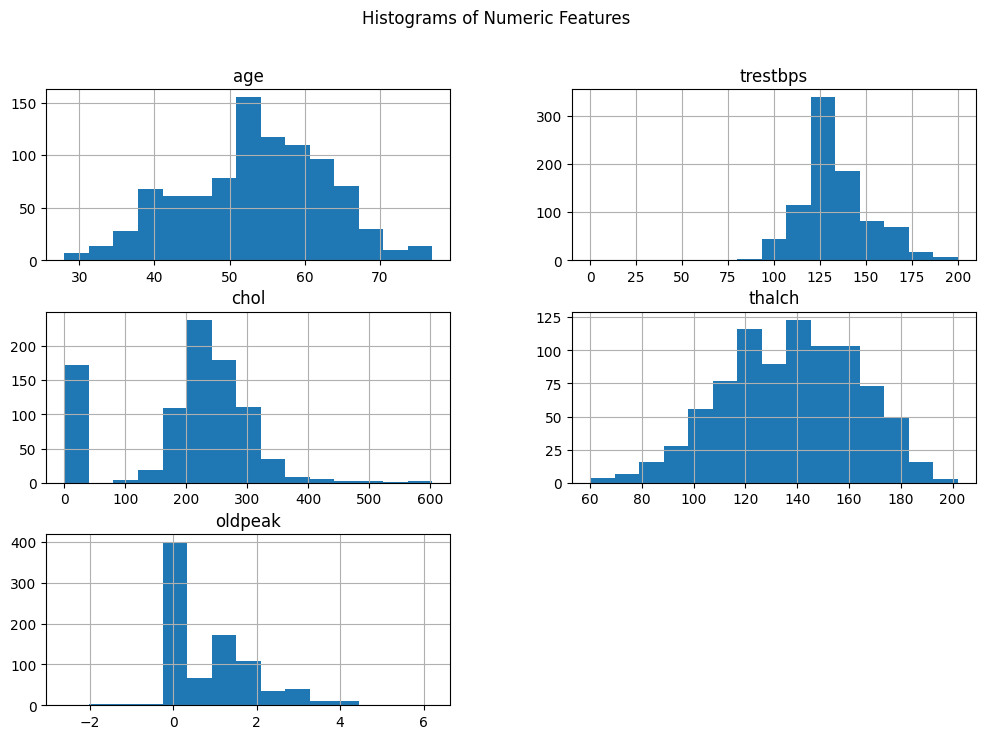

In [8]:
numeric_cols = ["age", "trestbps", "chol", "thalch", "oldpeak"]
df[numeric_cols].hist(figsize=(12, 8), bins=15)
plt.suptitle("Histograms of Numeric Features")
plt.savefig("../visuals/histograms/numeric_features.png", dpi=300, bbox_inches="tight")
plt.show()

## Boxplots for Outlier Detection

In [9]:
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col], palette="Set2")
    plt.title(f"Boxplot of {col}")
    plt.savefig(f"../visuals/boxplots/{col}_boxplot.png", dpi=300, bbox_inches="tight")
    plt.close()

C:\Users\acer\AppData\Local\Temp\ipykernel_32556\750036669.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette="Set2")
C:\Users\acer\AppData\Local\Temp\ipykernel_32556\750036669.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette="Set2")
C:\Users\acer\AppData\Local\Temp\ipykernel_32556\750036669.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette="Set2")
C:\Users\acer\AppData\Local\Temp\ipykernel_32556\750036669.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprec

## Correlation Matrix

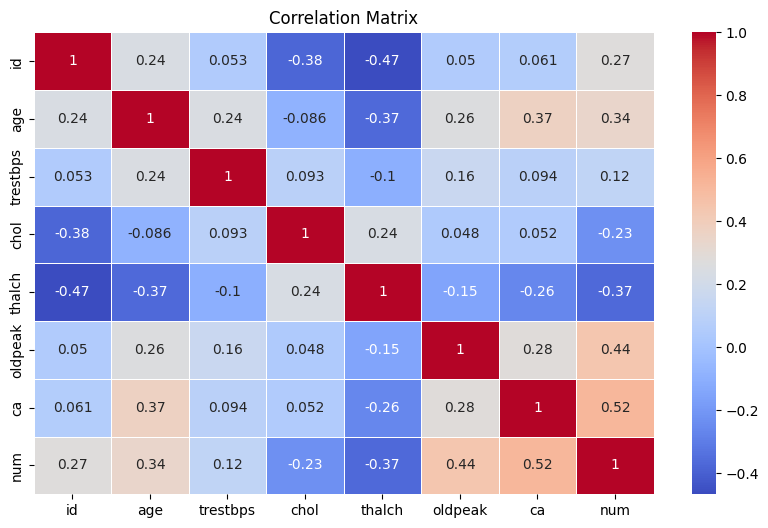

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.savefig("../visuals/correlation_matrix.png", dpi=300, bbox_inches="tight")
plt.show()

## Generate Profiling Report (HTML)

In [11]:
profile = ProfileReport(df, title="Heart Disease Dataset Profiling Report", explorative=True)
profile.to_file("../reports/eda_report.html")
print("\nEDA Completed. Reports and visuals saved to project folders.")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 62.50it/s]


EDA Completed. Reports and visuals saved to project folders.
